# Distribution Sampling Test

Goal: Compare methods of sampling from a matrix

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## Sampling Techniques

In [26]:
def metropolis_hastings(distribution,num_samples,start):
    '''
    Generate samples, get acceptance rate from metropolis-hastings sampling.
    Assume that all transition probabilities are equal (ignore conditional probs)
    
    param distribution: probability distribution (2D list)
    parma start: number of iterations to run before saving samples
    param num_counts: number of samples to generate
    return: sample counts (2D list)
    '''
    
    # initialize
    n = len(distribution)
    ip = np.random.randint(0,n)
    jp = np.random.randint(0,n)
    for i in range(start):
        ic = np.random.randint(0,n)
        jc = np.random.randint(0,n)
        a = np.random.uniform()
        
        # accept
        if distribution[ic][jc]/distribution[ip][jp] > a:
            ip = ic
            jp = jc
            
    # generate samples
    counts = [[0 for j in range(n)] for i in range(n)]
    for i in range(num_samples):
        ic = np.random.randint(0,n)
        jc = np.random.randint(0,n)
        a = np.random.uniform()
        
        # accept
        if distribution[ic][jc]/distribution[ip][jp] > a:
            ip = ic
            jp = jc

        # add to count
        counts[ip][jp] += 1
        
    return counts

In [27]:
def rejection_sampling(distribution,num_samples):
    '''
    Generate samples, get acceptance rate from rejection sampling
    
    param distribution: probability distribution (2D list)
    param num_counts: number of samples to generate
    return: sample counts (2D list), % acceptance
    '''
    
    # normalize distribution
    n = len(distribution)
    max_prob = max([max(distribution[i]) for i in range(n)])
    d = [[distribution[i][j]/max_prob for j in range(n)] for i in range(n)]
    
    # generate samples
    trials = 0
    accepted = 0
    counts = [[0 for j in range(n)] for i in range(n)]
    while(accepted < num_samples):
        i = np.random.randint(0,n)
        j = np.random.randint(0,n)
        a = np.random.uniform()
        trials += 1
        
        # accept
        if d[i][j] > a:
            counts[i][j] += 1
            accepted += 1
        
    return (counts,accepted/trials)

## Helpers: Error and Matrix Printing

In [28]:
def compare_distributions(distribution,counts,num_samples):
    '''
    Measure how well a sampling method matches a distribution
    
    param distribution: probability distribution (2D list)
    param counts: samples generated from distribution (2D list)
    param num_samples: total counts
    return: residual matrix, error
    '''
    
    # normalize distribution
    n = len(distribution)
    d_sum = 0
    for i in range(n):
        for j in range(n):
            d_sum += distribution[i][j]
    d = [[distribution[i][j]/d_sum for j in range(n)] for i in range(n)]
    
    # get residual and error
    residual = [[(counts[i][j]/num_samples) - d[i][j] for j in range(n)] for i in range(n)]
    error = 0
    for i in range(n):
        for j in range(n):
            error += residual[i][j] **2
    return (residual,error)

In [29]:
def mprint(A, name="", b=2, a=3):
    m = float("0." + "0" * (a - 1) + "1")
    name += ' = '
    for row in A:
        print(name, end='')
        name = ' ' * len(name)
        for elm in row:
            if elm != 0:
                s = str(round(elm, a))
                d = s.find('.')
                if d == -1: d = len(s)
                if len(s) > a + b + 1 or (elm < m) or d > b:
                    s = str("{:e}".format(elm))
                    e, d = s.find('e'), s.find('.')
                    rm = max(len(s) - (a + b + 1), e - d - a)
                    s = '*' if e - d < rm else s[:e - rm] + s[e:]
                    s = ' ' * (len(s) - b - max(0, len(s) - b)) + s
                    s = s + ' ' * (a + b + 1 - len(s))
                else:
                    s = ' ' * (b - d) + s
                    s = s + ' ' * (a + b + 1 - len(s))
            else:
                s = ' ' * (b - 1) + '0' + ' ' * (a + 1)
            print(s + "  ", end='')
        print()
    print()

## Test 1

In [30]:
# define distribution
distribution_1 = [[5.1,12.6,0.0,1.8,3.3],
                  [8.9,11.3,5.9,35.3,2.9],
                  [6.3,9.2,8.4,3.9,5.7],
                  [1.8,8.4,1.9,4.1,5.5],
                  [6.2,42.8,11.2,11.1,13.0]]
mprint(distribution_1,'distribution 1',2,1)
n = 5
num_samples = 1000

distribution 1 =  5.1  12.6   0     1.8   3.3  
                  8.9  11.3   5.9  35.3   2.9  
                  6.3   9.2   8.4   3.9   5.7  
                  1.8   8.4   1.9   4.1   5.5  
                  6.2  42.8  11.2  11.1  13.0  



rejection sampling: 0.2094240837696335 acceptance rate
     --> error 0.0003676818232453501
     --> residual = -4e-03  -1e-03   0      -9e-04   0.002  
                    -7e-03   0.003   0.003   0.003  -2e-03  
                    1.e-04  -5e-03  -6e-05  7.e-04  -4e-03  
                     0.002  -5e-03   0.003  9.e-04  -4e-03  
                     0.003   0.004  -3e-03   0.007   0.008  



Text(0.5, 1.0, 'Rejection Sampling Test 1')

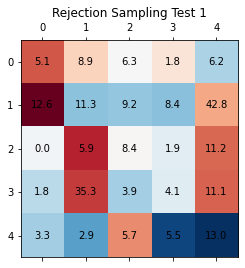

In [31]:
# rejection sampling
counts, acceptance = rejection_sampling(distribution_1, num_samples)
residual, error = compare_distributions(distribution_1,counts,num_samples)
print('rejection sampling:', acceptance, 'acceptance rate')
print('     --> error',error)
mprint(residual, '     --> residual',2,3)
# plot
fig, ax = plt.subplots()
vmin = min([min(residual[i]) for i in range(n)])
vmax = max([max(residual[i]) for i in range(n)])
divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
ax.matshow(residual, cmap='RdBu',norm=divnorm)
for i in range(n):
    for j in range(n):
        c = distribution_1[i][j]
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Rejection Sampling Test 1')

metropolis_hastings:
     --> error 0.005966393208947023
     --> residual =  0.013   0.017   0      -3e-03  -5e-04  
                     0.012   0.002  -3e-05  -6e-02  -7e-04  
                    -9e-03  -1e-02   0.008   0.005  -5e-03  
                    -1e-03   0.006  6.e-04   0.005  7.e-04  
                    -3e-03   0.032  5.e-04  -4e-03   0.003  



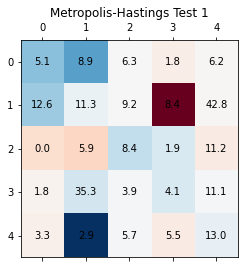

In [32]:
# metropolis-hastings
counts = metropolis_hastings(distribution_1, num_samples,1000)
residual, error = compare_distributions(distribution_1,counts,num_samples)
print('metropolis_hastings:')
print('     --> error',error)
mprint(residual, '     --> residual',2,3)
# plot
fig, ax = plt.subplots()
vmin = min([min(residual[i]) for i in range(n)])
vmax = max([max(residual[i]) for i in range(n)])
divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
ax.matshow(residual, cmap='RdBu',norm=divnorm)
for i in range(n):
    for j in range(n):
        c = distribution_1[i][j]
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Metropolis-Hastings Test 1')
plt.show()

## Test 2

In [33]:
# define distribution
distribution_2 = np.random.rand(30,30)
large = set()
for ii in range(8):
    i = np.random.randint(0,30)
    j = np.random.randint(0,30)
    large.add((i,j))
    distribution_2[i][j] += np.random.rand()*20
small = set()
for ii in range(8):
    i = np.random.randint(0,30)
    j = np.random.randint(0,30)
    small.add((i,j))
    distribution_2[i][j] += np.random.rand()*0.01
#mprint(distribution_2,'distribution 2',2,2)
n = 30
num_samples = 1000

rejection sampling: 0.03266479388515058 acceptance rate
     --> error 0.001149762056999906


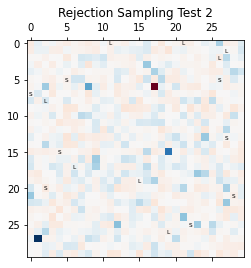

     --> min residual -0.014173976990730752
     --> max residual 0.008833464583799404



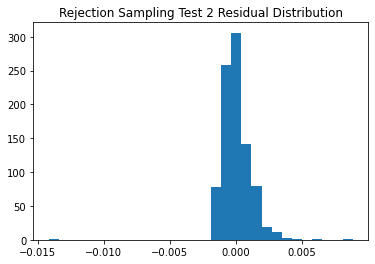

In [34]:
# rejection sampling
counts, acceptance = rejection_sampling(distribution_2, num_samples)
residual, error = compare_distributions(distribution_2,counts,num_samples)
print('rejection sampling:', acceptance, 'acceptance rate')
print('     --> error',error)
#mprint(residual, '     --> residual',2,3)
# plot
fig, ax = plt.subplots()
vmin = min([min(residual[i]) for i in range(n)])
vmax = max([max(residual[i]) for i in range(n)])
divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
ax.matshow(residual, cmap='RdBu',norm=divnorm)
for elm in large:
    ax.text(elm[0], elm[1], 'L', va='center', ha='center',fontsize = 'xx-small')
for elm in small:
    ax.text(elm[0], elm[1], 'S', va='center', ha='center',fontsize = 'xx-small')
plt.title('Rejection Sampling Test 2')
plt.show()
print('     --> min residual',vmin)
print('     --> max residual',vmax)
print()
plt.hist([j for sub in residual for j in sub],bins = 30)
plt.title('Rejection Sampling Test 2 Residual Distribution')
plt.show()

Metropolis-Hastings:
     --> error 0.007768320902967772


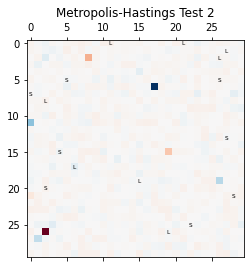

     --> min residual -0.03552774726439888
     --> max residual 0.06082602300926925


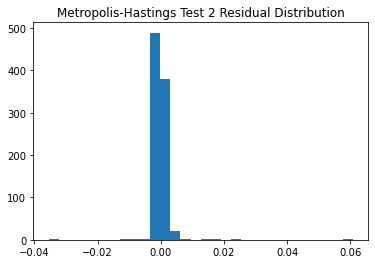

In [35]:
# metropolis-hastings
counts = metropolis_hastings(distribution_2, num_samples,1000)
residual, error = compare_distributions(distribution_2,counts,num_samples)
print('Metropolis-Hastings:')
print('     --> error',error)
#mprint(residual, '     --> residual',2,3)
# plot
fig, ax = plt.subplots()
vmin = min([min(residual[i]) for i in range(n)])
vmax = max([max(residual[i]) for i in range(n)])
divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
ax.matshow(residual, cmap='RdBu',norm=divnorm)
for elm in large:
    ax.text(elm[0], elm[1], 'L', va='center', ha='center',fontsize = 'xx-small')
for elm in small:
    ax.text(elm[0], elm[1], 'S', va='center', ha='center',fontsize = 'xx-small')
plt.title('Metropolis-Hastings Test 2')
plt.show()
print('     --> min residual',vmin)
print('     --> max residual',vmax)
plt.hist([j for sub in residual for j in sub],bins=30)
plt.title('Metropolis-Hastings Test 2 Residual Distribution')
plt.show()